# Titanic - Machine Learning from Disaster 

## Name: Ziad Tarek Salah Eldin Elgayar
## ID: 17P3047

<b>Project Objective: </b>
We want to build a predictive model that answers the question: “what sorts of people were more likely to survive?” We should use this model to make some predictions on 418 passengers who we have no idea if they survived or not.

<b> This project will pass by the following phases: </b>
> _Phase 1: Data Preprocessing and Feature Engineering_
>>_1-Importing needed libraries<br>_
>>_2-Reading Training and Test datasets_ <br>
>>_3-Running <code>trainingSet.Head()</code> , <code>trainingSet.info()</code> and <code>trainingSet.describe()</code><br>_
>>_4-Checking <code>value_counts()</code> on all columns<br>_
>>_5-Checking <code>isnull().sum()</code> for all columns<br>_
>>_6-Handling of NaN values in training and test data<br>_
>>_7-Some Data visualizations<br>_
>>_8-Vectorization of data<br>_
>>_9-Features Engineering<br>_
>>_10-Visualization of new features<br>_
>>_11-Vectorization of new features<br>_


## Imports

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import sklearn
import pandas as pd
import numpy
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression,SelectKBest
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score
from sklearn.metrics import accuracy_score

%matplotlib inline
sns.set(rc={'figure.figsize': [8,8]}, font_scale=1.2)

## Reading Training and Test datasets

In [2]:
trainingSet = pd.read_csv('train.csv')
testSet = pd.read_csv('test.csv')

## Running <code>head()</code> , <code>info()</code> and <code>describe()</code> on Train and Test<br>
*  <code>head()</code>: This is to preview the top 5 rows of the dataset
*  <code>info()</code>: This is to prevoew the columns of the dataset with the number of null values and data types
*  <code>describe()</code>: This is to preview the min,max,count,mean,std,25%,50% and 75% of each column 

<div class="alert alert-block alert-info">
    <b>Note: The testSet has the Survived column missing which is actually our target to fill</b>
</div>

In [3]:
trainingSet.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
testSet.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
trainingSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
testSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
trainingSet.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
testSet.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## Checking <code>value_counts()</code> on all columns

In [9]:
for col in trainingSet.columns:
    print(f'For column {col}\n------------------\n')
    print(trainingSet[col].value_counts())
    print('\n')

For column PassengerId
------------------

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64


For column Survived
------------------

0    549
1    342
Name: Survived, dtype: int64


For column Pclass
------------------

3    491
1    216
2    184
Name: Pclass, dtype: int64


For column Name
------------------

Wheadon, Mr. Edward H                                1
Nakid, Mr. Sahid                                     1
Lefebre, Miss. Jeannie                               1
O'Dwyer, Miss. Ellen "Nellie"                        1
McNamee, Mr. Neal                                    1
                                                    ..
Murphy, Miss. Margaret Jane                          1
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    1
Jensen, Mr. Svend Lauritz                            1
Givard, Mr. Hans Kristensen                          1
Moraweck, Dr. Ernest                      

In [10]:
for col in testSet.columns:
    print(f'For column {col}\n------------------\n')
    print(testSet[col].value_counts())
    print('\n')

For column PassengerId
------------------

1023    1
1128    1
1156    1
1157    1
1158    1
       ..
1305    1
1306    1
1307    1
1308    1
1024    1
Name: PassengerId, Length: 418, dtype: int64


For column Pclass
------------------

3    218
1    107
2     93
Name: Pclass, dtype: int64


For column Name
------------------

Franklin, Mr. Charles (Charles Fardon)    1
Guest, Mr. Robert                         1
Torfa, Mr. Assad                          1
Matinoff, Mr. Nicola                      1
Zakarian, Mr. Mapriededer                 1
                                         ..
Kelly, Mr. James                          1
Sincock, Miss. Maude                      1
Williams, Mr. Richard Norris II           1
Braf, Miss. Elin Ester Maria              1
Samaan, Mr. Hanna                         1
Name: Name, Length: 418, dtype: int64


For column Sex
------------------

male      266
female    152
Name: Sex, dtype: int64


For column Age
------------------

24.0    17
21.0    17


## Checking <code>isnull().sum()</code> for all columns

In [11]:
trainingSet.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
testSet.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Handling of NaN values in training and test data

<div class="alert alert-block alert-info">
    <b>Note: I found that mode or median are the best ways to fill the Embarked NaN values while mean should be the one used with the age. </b>
</div>

<div class="alert alert-block alert-warning">
    <b>Note: NaN values in Cabin column are too many to drop so we are just going to drop the whole column later</b>
</div>

In [13]:
trainingSet['Age'].fillna(trainingSet['Age'].mean(), inplace=True)
trainingSet['Embarked'].fillna(trainingSet['Embarked'].mode()[0], inplace=True)

<div class="alert alert-block alert-info">
    <b>Note:I chose mean to fill the only NaN value in the fare column of the test dataset </b>
</div>

In [14]:
testSet['Fare'].fillna(testSet['Fare'].mean(), inplace=True)
testSet['Age'].fillna(testSet['Age'].mean(), inplace=True)

### Rechecking <code>isnull().sum()</code> for all columns after filling NaN values

In [15]:
trainingSet.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [16]:
testSet.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

## Some Data Visualizations
**We will do some visualizations for the following:**
<ol>
    <li>Survived</li>
    <li>Pclass</li>
    <li>Age</li>
    <li>Sex</li>
    <li>Embarked</li>
    <li>Parch</li>
    <li>SibSp</li>
    <li>Fare</li>
    

<div class="alert alert-block alert-info">
    <b>Note: Survived => 1  
            <br> Didn't Survive => 0 </b>
</div>

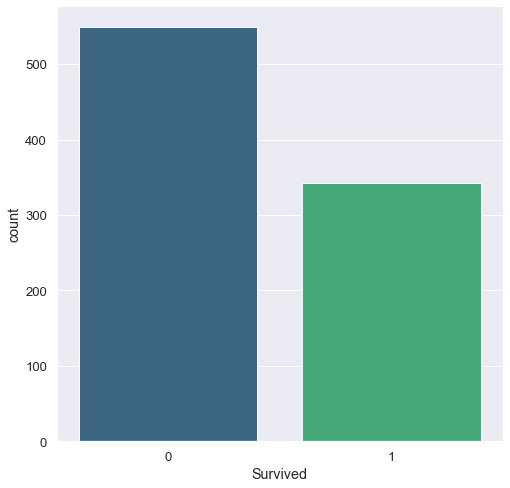

In [17]:
sns.countplot(x='Survived', data=trainingSet, palette='viridis')

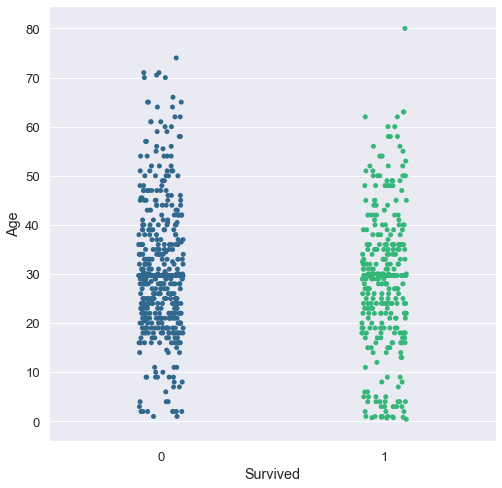

In [18]:
sns.stripplot(x="Survived", y="Age", data=trainingSet ,palette='viridis')

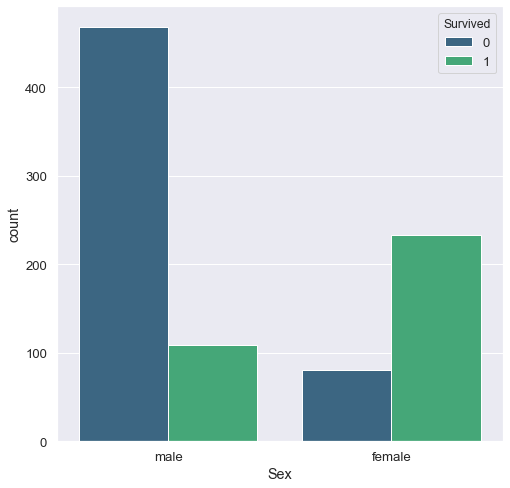

In [19]:
sns.countplot(x='Sex', data=trainingSet, hue='Survived', palette='viridis')

In [20]:
FemaleSurvival = ((trainingSet[trainingSet.Survived==1].Sex=='female').sum()/(trainingSet.Survived==1).sum())*100
MaleSurvival = ((trainingSet[trainingSet.Survived==1].Sex=='male').sum()/(trainingSet.Survived==1).sum())*100
print("Percentage of male survival is "+str(MaleSurvival)+"% While that of female survival is "+str(FemaleSurvival)+"%" )

Percentage of male survival is 31.871345029239766% While that of female survival is 68.12865497076024%


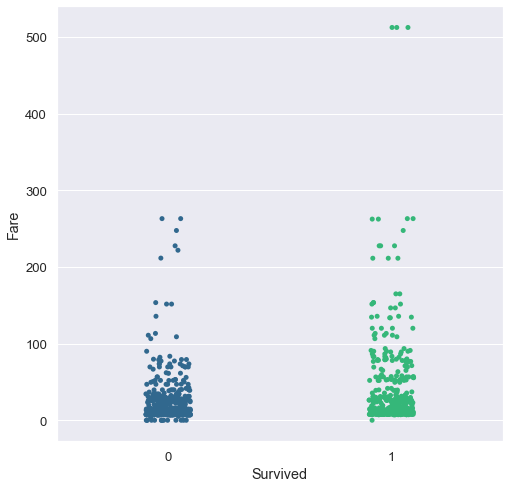

In [21]:
sns.stripplot(x="Survived", y="Fare", data=trainingSet ,palette='viridis')

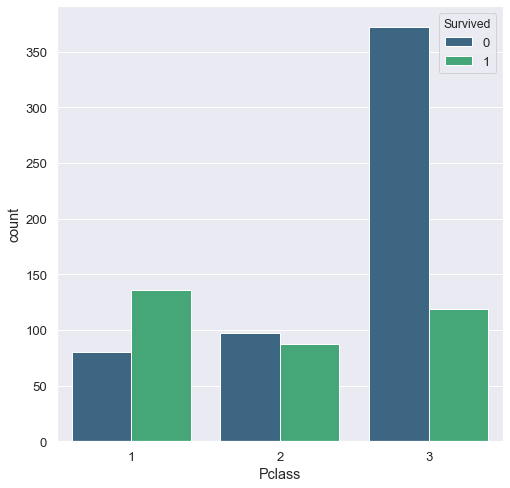

In [22]:
sns.countplot(x='Pclass', data=trainingSet, hue='Survived', palette='viridis')

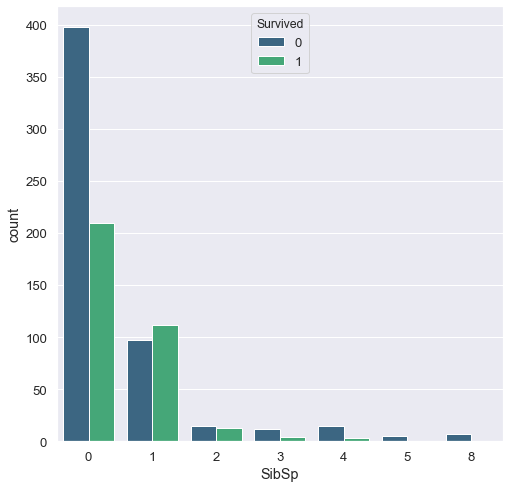

In [23]:
sns.countplot(x='SibSp', data=trainingSet, hue='Survived', palette='viridis')

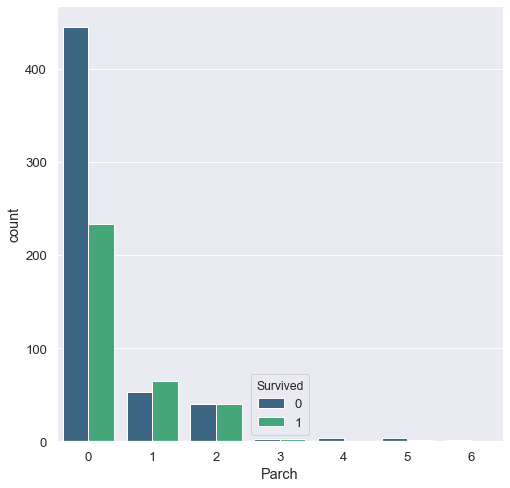

In [24]:
sns.countplot(x='Parch', data=trainingSet, hue='Survived', palette='viridis')

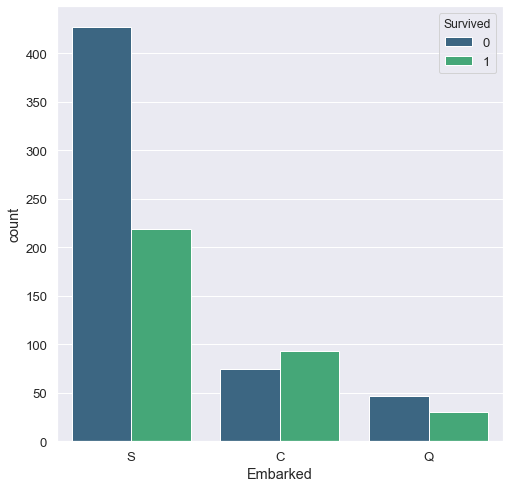

In [25]:
sns.countplot(x='Embarked', data=trainingSet, hue='Survived', palette='viridis')

## More Useful Plots

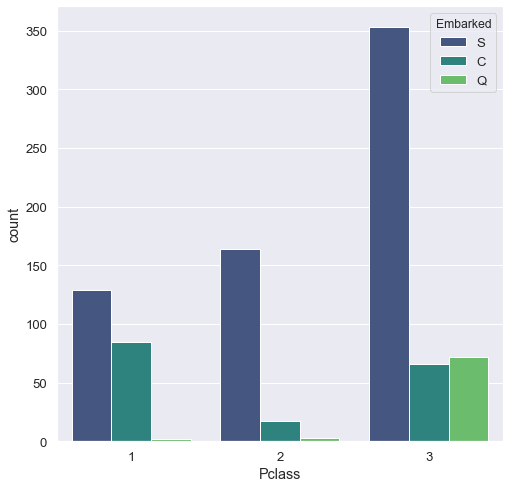

In [26]:
sns.countplot(x='Pclass', data=trainingSet, hue='Embarked', palette='viridis')

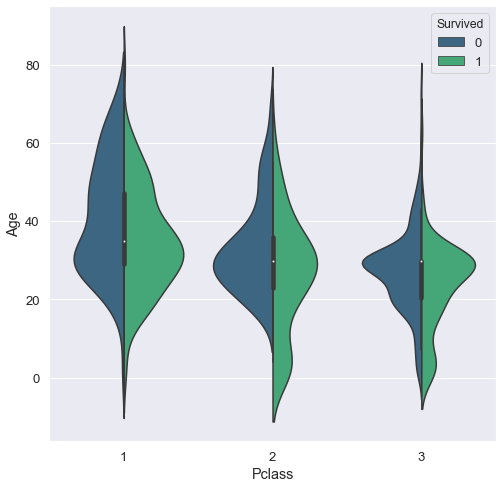

In [27]:
sns.violinplot(x='Pclass', y='Age', data=trainingSet, hue='Survived', split=True, palette='viridis')

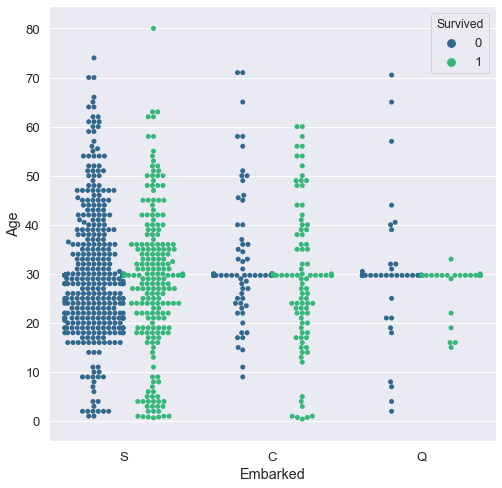

In [28]:
sns.swarmplot(x='Embarked', y='Age', data=trainingSet, hue='Survived', dodge=True, palette='viridis')

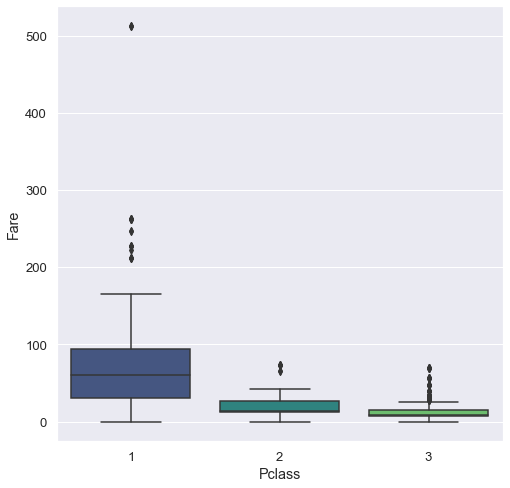

In [29]:
sns.boxplot(x='Pclass', y='Fare', data=trainingSet, palette='viridis')

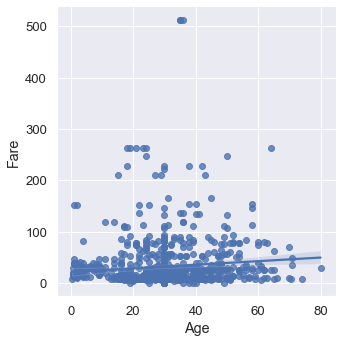

In [30]:
sns.lmplot(x='Age', y='Fare', data=trainingSet, palette='viridis')

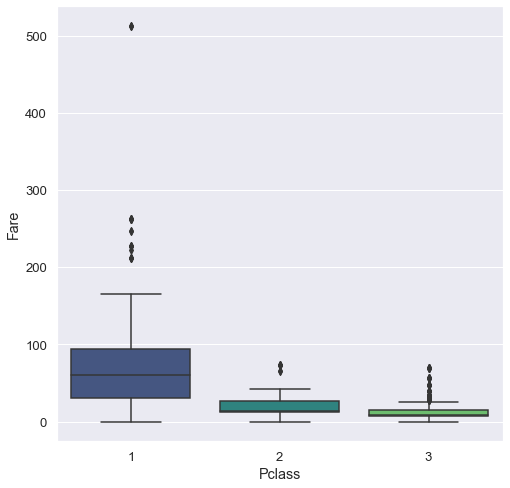

In [31]:
sns.boxplot(x='Pclass', y='Fare', data=trainingSet, palette='viridis')

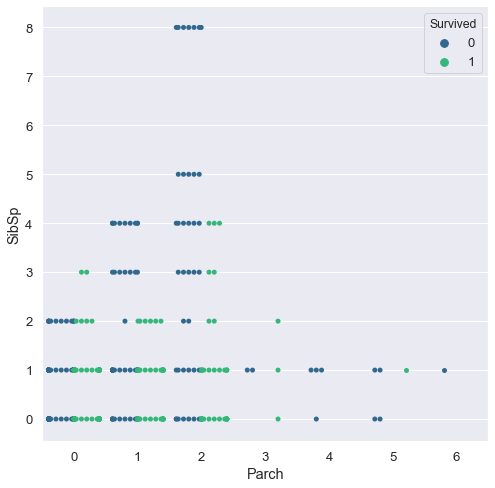

In [32]:
sns.swarmplot(x='Parch', y='SibSp', data=trainingSet, hue='Survived', dodge=True, palette='viridis')

<div class="alert alert-block alert-info">
    <b>We deduce from the above that:
        <ol>
            <li>You have higher probability to survive if your age is between 20 and 40. Though, the distribution is still fare. I believe that age is not correlated with survival rates</li>
            <li>If you are a female you have more than twice the probability to survive than a male.</li>
            <li>The low margin of fare with survived people is slightly higher than those who didn't survive</li>
            <li>If you booked a first class ticket then the probability of you surviving is too high. If you booked a third class ticket, it is so hard for you to survive</li>
            <li>If you are a female you have more than twice the probability to survive than a male.</li>
            <li>The more siblings, parents,or children you have, the higher the probability of you not surviving </li>
            <li>The ship had mainly Southampton passengers. </li>
        </ol>
</div>

## Vectorization of data <br>
All input values we give to our machine learning model should be in the form of Integers. Because Neural Networks or commonly machine learning model handles integer representation of data. We need to make sure that columns that we might need are in integer format

In [33]:
trainingSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<div class="alert alert-block alert-danger">
    <b>Note: Sex, Age, Fare and Embarked need to have integer format </b>
</div>

### Vectorizing of Sex
| Gender | Value |
| --- | --- |
| female | 0 |
| male| 1 |

In [34]:
le = LabelEncoder()
trainingSet['Sex'] = le.fit_transform(trainingSet['Sex'] )
testSet['Sex'] = le.fit_transform(testSet['Sex'] )

### Vectorizing of Age
| Age Interval | Value |
| --- | --- |
| Age <= 18 | 0 |
| 18 < Age <= 35| 1 |
| 35 < Age <= 50 | 2 |
| 50 < Age <= 64 | 3 |
| Age > 64 | 4 |

In [35]:
trainingSet.loc[ trainingSet['Age'] <= 18.0, 'Age'] = 0
trainingSet.loc[(trainingSet['Age'] > 18.0) & (trainingSet['Age'] <= 35.0), 'Age'] = 1
trainingSet.loc[(trainingSet['Age'] > 35.0) & (trainingSet['Age'] <= 50.0), 'Age'] = 2
trainingSet.loc[(trainingSet['Age'] > 50.0) & (trainingSet['Age'] <= 64.0), 'Age'] = 3
trainingSet.loc[ trainingSet['Age'] > 64.0, 'Age']=4
testSet.loc[ testSet['Age'] <= 18, 'Age'] = 0
testSet.loc[(testSet['Age'] > 18) & (testSet['Age'] <= 35), 'Age'] = 1
testSet.loc[(testSet['Age'] > 35) & (testSet['Age'] <= 50), 'Age'] = 2
testSet.loc[(testSet['Age'] > 50) & (testSet['Age'] <= 64), 'Age'] = 3
testSet.loc[ testSet['Age'] > 64, 'Age']=4
trainingSet['Age']= trainingSet['Age'].astype(numpy.int64)
testSet['Age']= testSet['Age'].astype(numpy.int64)

### Vectorizing of Fare
| Fare Interval | Value |
| --- | --- |
| Fare <= 7.5 | 0 |
| 7.5 < Fare <= 14.5| 1 |
| 14.5 < Fare <= 31 | 2 |
| Fare > 31 | 3 |

In [36]:
trainingSet.loc[ trainingSet['Fare'] <= 7.50, 'Fare'] = 0
trainingSet.loc[(trainingSet['Fare'] > 7.50)&(trainingSet['Fare'] <= 14.50), 'Fare'] = 1
trainingSet.loc[(trainingSet['Fare'] > 14.50) & (trainingSet['Fare'] <= 31.0), 'Fare']   = 2
trainingSet.loc[ trainingSet['Fare'] > 31.0, 'Fare'] = 3
testSet.loc[ testSet['Fare'] <= 7.50, 'Fare'] = 0
testSet.loc[(testSet['Fare'] > 7.50)&(testSet['Fare'] <= 14.50), 'Fare'] = 1
testSet.loc[(testSet['Fare'] > 14.50) & (testSet['Fare'] <= 31.0), 'Fare']   = 2
testSet.loc[ testSet['Fare'] > 31.0, 'Fare'] = 3
trainingSet['Fare']= trainingSet['Fare'].astype(numpy.int64)
testSet['Fare']= testSet['Fare'].astype(numpy.int64)

### Vectorizing of Embarked
| Embarked | Value |
| --- | --- |
| S | 0 |
| C | 1 |
| Q | 2 |

In [37]:
trainingSet['Embarked'] = le.fit_transform(trainingSet['Embarked'])
testSet['Embarked'] = le.fit_transform(testSet['Embarked'] )

In [38]:
trainingSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Name         891 non-null    object
 4   Sex          891 non-null    int32 
 5   Age          891 non-null    int64 
 6   SibSp        891 non-null    int64 
 7   Parch        891 non-null    int64 
 8   Ticket       891 non-null    object
 9   Fare         891 non-null    int64 
 10  Cabin        204 non-null    object
 11  Embarked     891 non-null    int32 
dtypes: int32(2), int64(7), object(3)
memory usage: 76.7+ KB


In [39]:
testSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  418 non-null    int64 
 1   Pclass       418 non-null    int64 
 2   Name         418 non-null    object
 3   Sex          418 non-null    int32 
 4   Age          418 non-null    int64 
 5   SibSp        418 non-null    int64 
 6   Parch        418 non-null    int64 
 7   Ticket       418 non-null    object
 8   Fare         418 non-null    int64 
 9   Cabin        91 non-null     object
 10  Embarked     418 non-null    int32 
dtypes: int32(2), int64(6), object(3)
memory usage: 32.8+ KB


## Feature Engineering and Extraction

<div class="alert alert-block alert-info">
    <b> Note: </b> I'll be extracting 3 new features from the given data which are:
    <ul>
        <li>1- Title: This will be extracted from the Passenger's Name.</li>
        <li>2- NumberOfRelatedPassenger: This will be the sum of the Parch and SibSp.</li>
        <li>3- isAlone: This features gives one if the passenger was alone on the ship this is calculated form the number of related passengers.</li>
    </ul>
</div>

**Before we can actually add the new columns we need two helping functions:** <br>
The First on is extractTitle: This function takes the name of the passenger and returns his title. It then classifies the title into 5 classes:<ol>
    <li>Mr: This one carries almost the same meaning as the following ['Sir','Capt','Don','Col','Jonkheer','Rev','Major']</li>
    <li>Dr: This is to make sure that important people like doctors may have surviived</li>
    <li>Master: This is to make sure that high people like doctors may have surviived</li>
    <li>Mrs: This one carries almost the same meaning as the following ['Dona','theCountess','Lady', 'Mrs']</li>
    <li>Miss: This one carries almost the same meaning as the following ['Mme','Mlle','Miss','Ms']</li>
</ol>
<br>
The Second one is isAlone: This function returns 1 if the number of related passengers is less that 1 which means the passenger was alone

In [40]:
def extractTitle(name):
    title=name.split('.')[0].split(',')[1].replace(" ","")
    MrList=['Sir','Capt','Don','Col','Jonkheer','Rev','Major','Mr']
    MrsList=['Dona','theCountess','Lady', 'Mrs']
    MissList=['Mme','Mlle','Miss','Ms']
    if title in MrList:
        return 'Mr'
    elif title=='Dr':
        return 'Dr'
    elif title=='Master':
        return 'Master'
    elif title in MrsList:
        return 'Mrs'
    elif title in MissList:
        return 'Miss'
    else:
        return 0
    
def isAlone(noOfRelatives):
    if noOfRelatives <1:
        return 1
    else:
        return 0

**Now Its time to add the new features**

In [41]:
trainingSet['Title'] = trainingSet.Name.map(extractTitle)
testSet['Title'] = testSet.Name.map(extractTitle)
trainingSet['NumberOfRelatedPassengers'] = trainingSet['SibSp'] + trainingSet['Parch']
testSet['NumberOfRelatedPassengers'] = testSet['SibSp'] + testSet['Parch']
trainingSet['Alone?'] = trainingSet.NumberOfRelatedPassengers.map(isAlone)
testSet['Alone?'] = testSet.NumberOfRelatedPassengers.map(isAlone)

In [42]:
trainingSet.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,NumberOfRelatedPassengers,Alone?
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,2,Mr,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3,C85,0,Mrs,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1,NaN,2,Miss,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,0,113803,3,C123,2,Mrs,1,0
4,5,0,3,"Allen, Mr. William Henry",1,1,0,0,373450,1,NaN,2,Mr,0,1


## Visualizing Added Features

In [43]:
for col in trainingSet.columns:
    print(f'For column {col}\n------------------\n')
    print(trainingSet[col].value_counts())
    print('\n')

For column PassengerId
------------------

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64


For column Survived
------------------

0    549
1    342
Name: Survived, dtype: int64


For column Pclass
------------------

3    491
1    216
2    184
Name: Pclass, dtype: int64


For column Name
------------------

Wheadon, Mr. Edward H                                1
Nakid, Mr. Sahid                                     1
Lefebre, Miss. Jeannie                               1
O'Dwyer, Miss. Ellen "Nellie"                        1
McNamee, Mr. Neal                                    1
                                                    ..
Murphy, Miss. Margaret Jane                          1
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    1
Jensen, Mr. Svend Lauritz                            1
Givard, Mr. Hans Kristensen                          1
Moraweck, Dr. Ernest                      

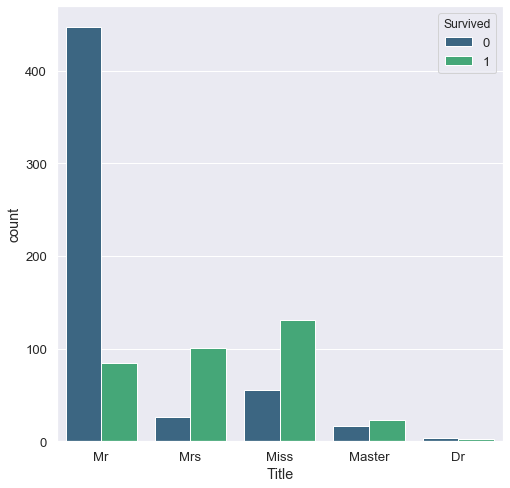

In [44]:
sns.countplot(x='Title', data=trainingSet, hue='Survived', palette='viridis')

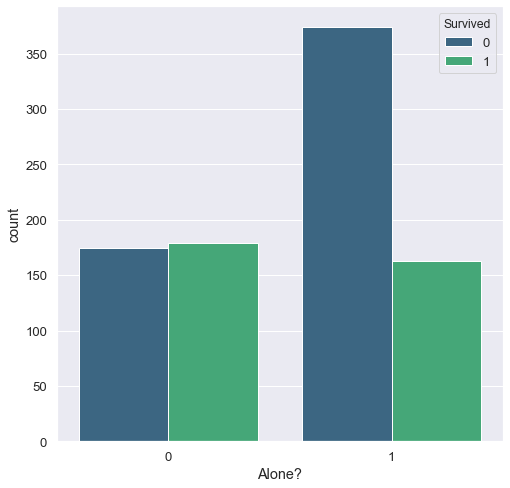

In [45]:
sns.countplot(x='Alone?', data=trainingSet, hue='Survived', palette='viridis')

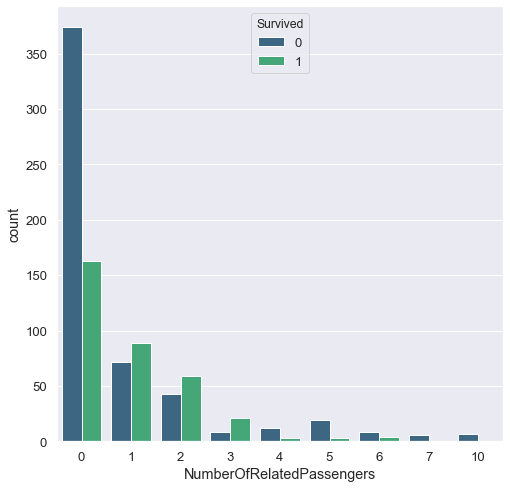

In [46]:
sns.countplot(x='NumberOfRelatedPassengers', data=trainingSet, hue='Survived', palette='viridis')

<div class="alert alert-block alert-info">
    <b>We deduce from the above that:
        <ol>
            <li>Stiil proven that when you're a female you're probably going to survive. But what we can add is that if you are a master you have higher probability of surviving</li>
            <li>You are more likely to survive if you travelled alone.</li>
        </ol>
</div>

## Vectorize Added Features

**We now need to vectorize the title feature to give it integer values for better modelling**

In [47]:
trainingSet.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,NumberOfRelatedPassengers,Alone?
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,A/5 21171,0,NaN,2,Mr,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,PC 17599,3,C85,0,Mrs,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,STON/O2. 3101282,1,NaN,2,Miss,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,1,0,113803,3,C123,2,Mrs,1,0
4,5,0,3,"Allen, Mr. William Henry",1,1,0,0,373450,1,NaN,2,Mr,0,1


### Vectorizing of Title
| Gender | Value |
| --- | --- |
| Mr | 3 |
| Dr | 0 |
| Master | 1 |
| Mrs | 4 |
| Miss | 2 |

In [48]:
#trainingSet['Title'] = le.fit_transform(trainingSet['Title'])
#testSet['Title'] = le.fit_transform(testSet['Title'] )
trainingSet.loc[trainingSet['Title'] == 'Mr', 'Title'] = 0
trainingSet.loc[trainingSet['Title'] == 'Dr', 'Title'] = 1
trainingSet.loc[trainingSet['Title'] == 'Master', 'Title'] = 2
trainingSet.loc[trainingSet['Title'] == 'Mrs', 'Title'] =3
trainingSet.loc[trainingSet['Title'] == 'Miss', 'Title'] =4
testSet.loc[testSet['Title'] == 'Mr', 'Title'] = 0
testSet.loc[testSet['Title'] == 'Dr', 'Title'] = 1
testSet.loc[testSet['Title'] == 'Master', 'Title'] = 2
testSet.loc[testSet['Title'] == 'Mrs', 'Title'] =3
testSet.loc[testSet['Title'] == 'Miss', 'Title'] =4
trainingSet['Title'] = trainingSet['Title'].astype(int)
testSet['Title'] = testSet['Title'].astype(int)

In [49]:
trainingSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   PassengerId                891 non-null    int64 
 1   Survived                   891 non-null    int64 
 2   Pclass                     891 non-null    int64 
 3   Name                       891 non-null    object
 4   Sex                        891 non-null    int32 
 5   Age                        891 non-null    int64 
 6   SibSp                      891 non-null    int64 
 7   Parch                      891 non-null    int64 
 8   Ticket                     891 non-null    object
 9   Fare                       891 non-null    int64 
 10  Cabin                      204 non-null    object
 11  Embarked                   891 non-null    int32 
 12  Title                      891 non-null    int32 
 13  NumberOfRelatedPassengers  891 non-null    int64 
 14  Alone?    

In [50]:
for col in trainingSet.columns:
    print(f'For column {col}\n------------------\n')
    print(trainingSet[col].value_counts())
    print('\n')

For column PassengerId
------------------

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64


For column Survived
------------------

0    549
1    342
Name: Survived, dtype: int64


For column Pclass
------------------

3    491
1    216
2    184
Name: Pclass, dtype: int64


For column Name
------------------

Wheadon, Mr. Edward H                                1
Nakid, Mr. Sahid                                     1
Lefebre, Miss. Jeannie                               1
O'Dwyer, Miss. Ellen "Nellie"                        1
McNamee, Mr. Neal                                    1
                                                    ..
Murphy, Miss. Margaret Jane                          1
Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    1
Jensen, Mr. Svend Lauritz                            1
Givard, Mr. Hans Kristensen                          1
Moraweck, Dr. Ernest                      

**Now let's preview the reult of all our previous work by plotting the correlation matrix**

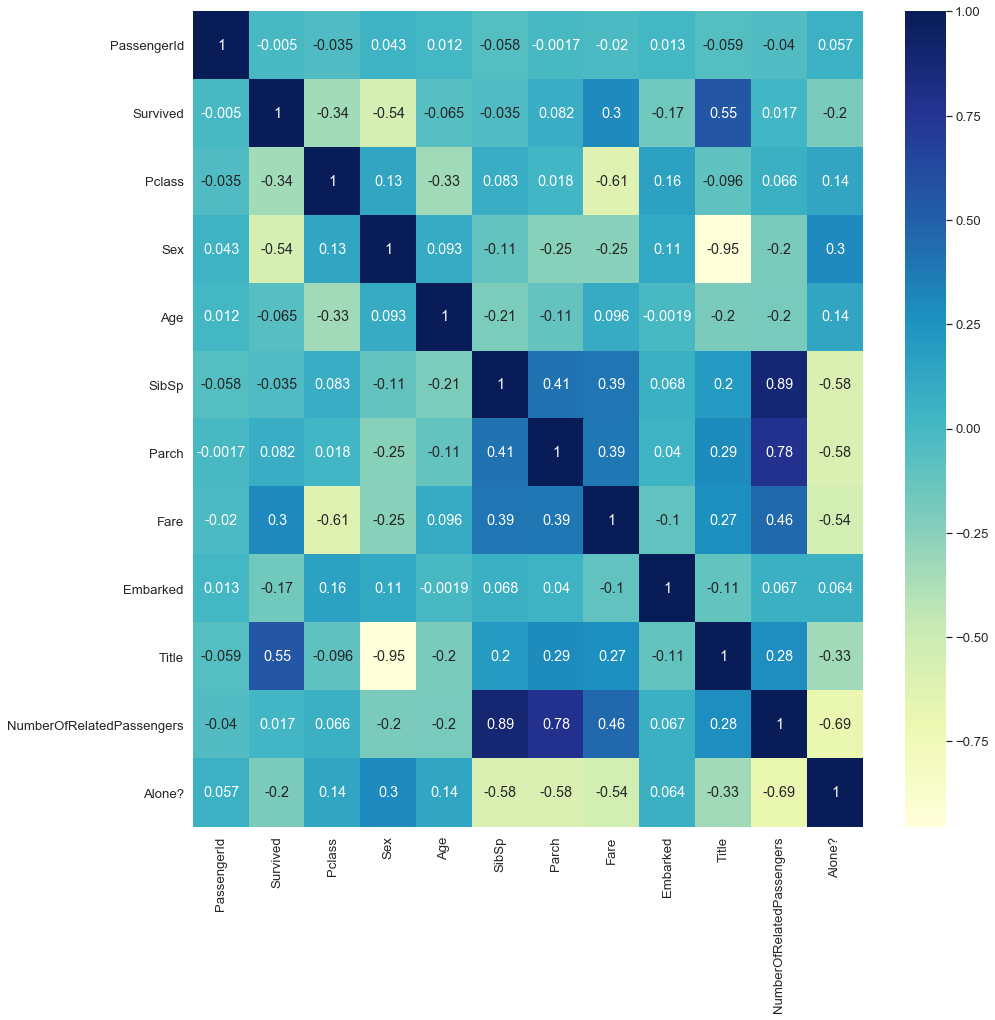

In [51]:
trainingSetcorr=trainingSet.corr()
sns.set(rc={'figure.figsize': [15,15]}, font_scale=1.2)
sns.heatmap(trainingSetcorr, cmap='YlGnBu', annot=True)

<div class="alert alert-block alert-info">
    <b>From the above matrix we can deduce that the effective features that are correlated with the survival ratio are:</b>
    <ol>
        <li>Title</li>
        <li>Sex</li>
        <li>Pclass</li>
        <li>Fare</li>
        <li>Alone?</li>
        <li>Embarked</li>
    </ol>
</div>

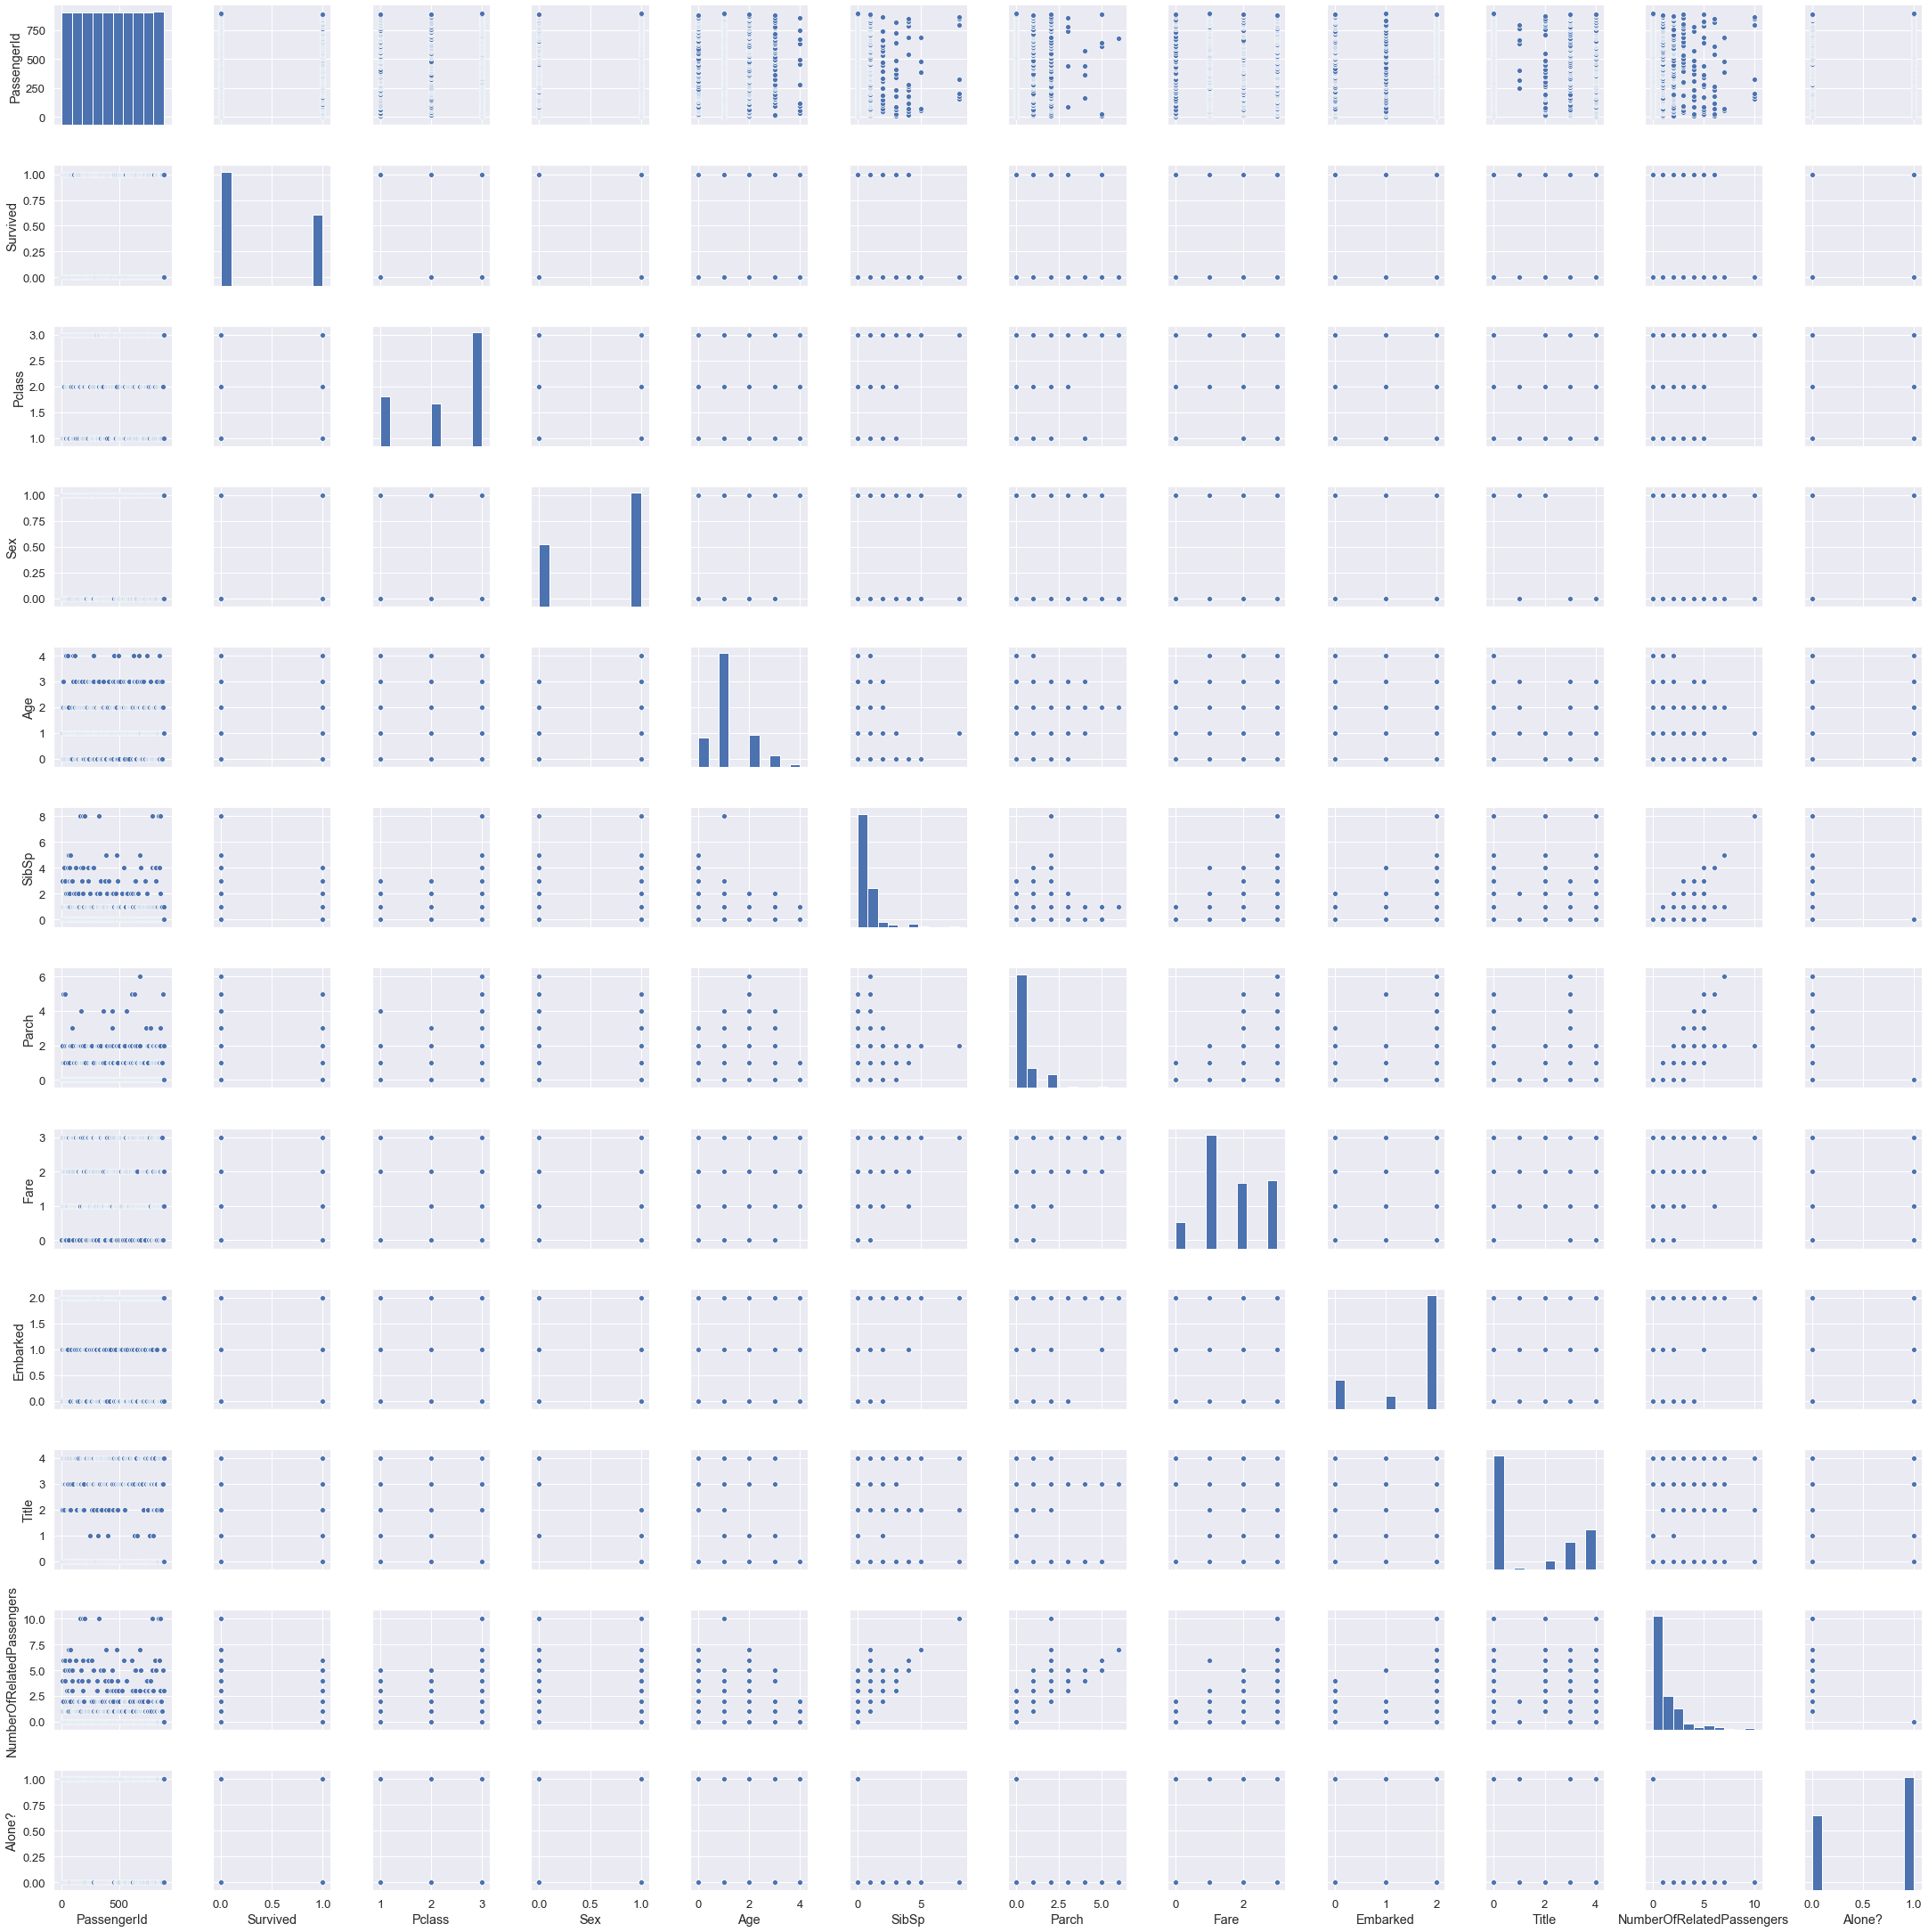

In [52]:
sns.pairplot(trainingSet)

<div class="alert alert-block alert-success">
    <b>WE ARE FINALLY DONE WITH PREPROCCESSING AND FEATURE ENGINEERING PHASE <br>Now we're ready to move to the next Phase </b>
</div>

> _Phase 2: Model Building_
>>_1-Features Selection<br>_
>>_2-Splitting Of Data_ <br>
>>_3-Different Models Creation<br>_
>>_4-Models fitting<br>_
>>_5-Cross Validation with K-Folds<br>_
>>_6-Hyperparameter Tunning with Grid Search<br>_
>>_6-Loading Data to CSVs<br>_

## Feature Selection

In [53]:
x = trainingSet.drop(['PassengerId','Survived','Name','Ticket','Cabin','Parch','SibSp'], axis=1)
y = trainingSet['Survived']
allFeatures = x.columns
selector=SelectKBest(k=5, score_func=f_regression)
selector.fit(x, y)
selectedFeaturesIdx = selector.get_support(indices=True)
selectedFeatures=allFeatures[selectedFeaturesIdx]

In [54]:
selectedFeatures

Index(['Pclass', 'Sex', 'Fare', 'Title', 'Alone?'], dtype='object')

<div class="alert alert-block alert-info">
    <b>We deduce from the above that:
        <ol>
            <li>Our Above expectations from the correlation matrix matches the Selectors results.</li>
            <li>Without preprocessing we wouldn't have noticed that age is not actually an affecting feature</li>
        </ol>
</div>

## Splitting Of Data

In [101]:
x = trainingSet[selectedFeatures]
y = trainingSet['Survived']

In [56]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=42, test_size=0.1)

In [57]:
print(len(xtrain))
print(len(xtest))

801
90


## Different Models Creation and Models Fitting

### Logistic Regression

In [100]:
model1 = LogisticRegression()
model1.fit(xtrain, ytrain)
ypred1 = model1.predict(xtest)

### K-Nearest Neighbors

In [59]:
scaler1=StandardScaler()
scaler1.fit(xtrain)
model2= KNeighborsClassifier()
model2.fit(xtrain,ytrain)
ypred2 = model2.predict(xtest)

### Decision Tree

In [60]:
scaler2=StandardScaler()
scaler2.fit(xtrain)
model3= DecisionTreeClassifier()
model3.fit(xtrain,ytrain)
ypred3 = model3.predict(xtest)

### Support Vector Machine

In [61]:
scaler3=StandardScaler()
scaler3.fit(xtrain)
model4= SVC(kernel='linear')
model4.fit(xtrain,ytrain)
ypred4 = model4.predict(xtest)

### Linear Regression

In [62]:
model5 = LinearRegression()
model5.fit(xtrain, ytrain)
ypred5= model5.predict(xtest)
for i in range(len(ypred5)):
    if ypred5[i] >= 0.5:
        ypred5[i] = int('1')
    else:
        ypred5[i] = int('0')
ypred5=ypred5.astype('int64')

### Random Forest

In [63]:
model6 = RandomForestClassifier(n_estimators=100)
model6.fit(xtrain, ytrain)
ypred6= model6.predict(xtest)

## Cross Validation

In [64]:
cf1=confusion_matrix(ytest, ypred1)
cf2=confusion_matrix(ytest, ypred2)
cf3=confusion_matrix(ytest, ypred3)
cf4=confusion_matrix(ytest, ypred4)
cf5=confusion_matrix(ytest, ypred5)
cf6=confusion_matrix(ytest, ypred6)

In [65]:
Score1=model1.score(xtest, ytest)
print("Score of Logistic Regression : "+str(Score1*100))
Score2=model2.score(xtest, ytest)
print("Score of KNN : "+str(Score2*100))
Score3=model3.score(xtest, ytest)
print("Score of Decision Tree : "+str(Score3*100))
Score4=model4.score(xtest, ytest)
print("Score of SVM : "+str(Score4*100))
Score5=model5.score(xtest, ytest)
print("Score of Linear Regression : "+str(Score5*100))
Score6=model6.score(xtest, ytest)
print("Score of Random Forest : "+str(Score6*100))

Score of Logistic Regression : 84.44444444444444
Score of KNN : 80.0
Score of Decision Tree : 81.11111111111111
Score of SVM : 81.11111111111111
Score of Linear Regression : 48.97244511262142
Score of Random Forest : 81.11111111111111


<div class="alert alert-block alert-info">
    <b>Note: Confusion Matrix Says how many ones where predicted as ones and how many where predicted as zeros and does that same with actual zero values</b>
</div>


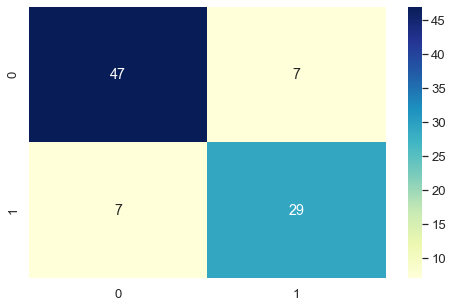

In [66]:
sns.set(rc={'figure.figsize': [8,5]}, font_scale=1.2)
sns.heatmap(cf1, cmap='YlGnBu', annot=True)

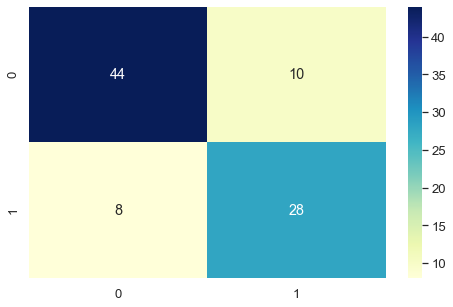

In [67]:
sns.heatmap(cf2, cmap='YlGnBu', annot=True)

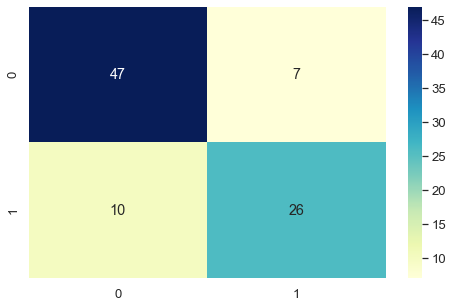

In [68]:
sns.heatmap(cf3, cmap='YlGnBu', annot=True)

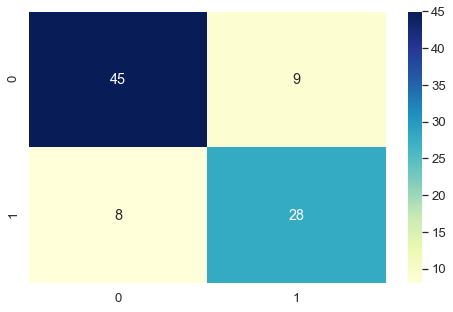

In [69]:
sns.heatmap(cf4, cmap='YlGnBu', annot=True)

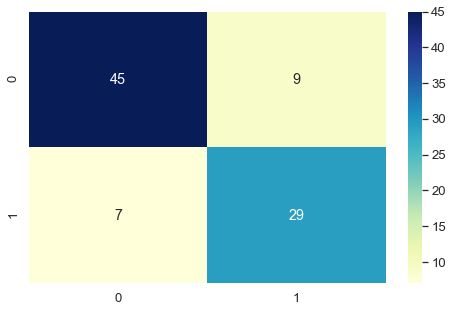

In [70]:
sns.heatmap(cf5, cmap='YlGnBu', annot=True)

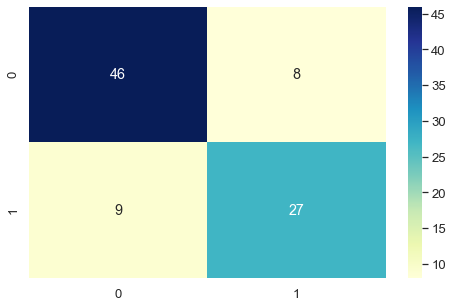

In [71]:
sns.heatmap(cf6, cmap='YlGnBu', annot=True)

In [72]:
accuracies1 = cross_val_score(estimator=model1, X=xtrain, y=ytrain, cv=10)
print("Score of Logistic Regression : "+str(accuracies1.mean()*100))
accuracies2 = cross_val_score(estimator=model2, X=xtrain, y=ytrain, cv=10)
print("Score of KNN : "+str(accuracies2.mean()*100))
accuracies3 = cross_val_score(estimator=model3, X=xtrain, y=ytrain, cv=10)
print("Score of Decision Tree : "+str(accuracies3.mean()*100))
accuracies4 = cross_val_score(estimator=model4, X=xtrain, y=ytrain, cv=10)
print("Score of SVM : "+str(accuracies4.mean()*100))
accuracies5 = cross_val_score(estimator=model5, X=xtrain, y=ytrain, cv=10)
print("Score of Linear Regression : "+str(accuracies5.mean()*100))
accuracies6 = cross_val_score(estimator=model6, X=xtrain, y=ytrain, cv=10)
print("Score of Random Forest : "+str(accuracies6.mean()*100))

Score of Logistic Regression : 78.2746913580247
Score of KNN : 79.77623456790124
Score of Decision Tree : 79.14969135802468
Score of SVM : 78.40586419753086
Score of Linear Regression : 35.70691809435004
Score of Random Forest : 79.2746913580247


### K-Folds for Cross Validation
**In the k-fold cross validation method, all the entries in the original training data set are used for both training as well as validation. Also, each entry is used for validation just once.**

In [73]:
logRegCv = cross_validate(model1, xtrain, ytrain, cv=10, return_train_score=True, n_jobs=-1)
logRegCv['test_score'].mean()

0.782746913580247

In [74]:
knnCv = cross_validate(model2, xtrain, ytrain, cv=10, return_train_score=True, n_jobs=-1)
knnCv['test_score'].mean()

0.7977623456790124

In [75]:
decisionTreeCv = cross_validate(model3, xtrain, ytrain, cv=10, return_train_score=True, n_jobs=-1)
decisionTreeCv['test_score'].mean()

0.7914969135802469

In [76]:
svmCv = cross_validate(model4, xtrain, ytrain, cv=10, return_train_score=True, n_jobs=-1)
svmCv['test_score'].mean()

0.7840586419753086

In [77]:
linearRegCv = cross_validate(model5, xtrain, ytrain, cv=10, return_train_score=True, n_jobs=-1)
linearRegCv['test_score'].mean()

0.3570691809435004

In [78]:
randomFCv = cross_validate(model6, xtrain, ytrain, cv=10, return_train_score=True, n_jobs=-1)
randomFCv['test_score'].mean()

0.798996913580247

### Grid Search for Hyperparameter Tunning
**GridSearchCV tries all the combinations of the values passed in the dictionary and evaluates the model for each combination using the Cross-Validation method. Hence after using this function we get accuracy/loss for every combination of hyperparameters and we can choose the one with the best performance.**

**Logistic Regression**

In [79]:
grid1={"C":numpy.logspace(-3,3,7), "penalty":["l1","l2"]}
model1cv=GridSearchCV(model1,grid1,cv=10)
model1cv.fit(xtrain,ytrain)
print("Tuned hpyerparameters for Logistic Regression :(best parameters) ",model1cv.best_params_)
print("accuracy :",model1cv.best_score_)

C:\myAnaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\myAnaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\myAnaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\myAnaconda\lib\site-packages\sklearn\model_selection\_validation.py:536: 

Tuned hpyerparameters for Logistic Regression :(best parameters)  {'C': 0.01, 'penalty': 'l2'}
accuracy : 0.7878240740740741


**K-Nearest Neighbors**

In [80]:
grid2={'n_neighbors': (1,10, 1),
        'leaf_size': (20,40,1),
        'p': (1,2),
        'weights': ('uniform', 'distance'),
        'metric': ('minkowski', 'chebyshev')}
model2cv=GridSearchCV(model2,grid2,n_jobs = -1,cv=10)
model2cv.fit(xtrain,ytrain)
print("Tuned hpyerparameters for K-Nearest Neighbors :(best parameters) ",model2cv.best_params_)
print("accuracy :",model2cv.best_score_)

Tuned hpyerparameters for K-Nearest Neighbors :(best parameters)  {'leaf_size': 40, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
accuracy : 0.7977469135802469


**Decision Tree**

In [81]:
grid3= {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150]}
model3cv = GridSearchCV(model3, grid3, cv=10)
model3cv.fit(xtrain,ytrain)
print("Tuned hpyerparameters for Decision Tree:(best parameters) ",model3cv.best_params_)
print("accuracy :",model3cv.best_score_)

Tuned hpyerparameters for Decision Tree:(best parameters)  {'criterion': 'entropy', 'max_depth': 4}
accuracy : 0.8027314814814815


**SVM**

In [82]:
grid4= [{'C':[1, 10, 100], 'kernel':['linear', 'sigmoid', 'poly']},
        {'C':[1, 10, 100], 'kernel':['rbf'], 'gamma':[0.5, 0.6, 0.7, 0.1, 0.01, 0.01]}]

model4cv = GridSearchCV(model4,grid4,cv=10)
model4cv.fit(xtrain,ytrain)
print("Tuned hpyerparameters for SVM:(best parameters) ",model4cv.best_params_)
print("accuracy :",model4cv.best_score_)

Tuned hpyerparameters for SVM:(best parameters)  {'C': 10, 'kernel': 'poly'}
accuracy : 0.8089351851851851


**Linear Regression**

In [83]:
grid5={"fit_intercept":[True,False]}
model5cv=GridSearchCV(model5,grid5,cv=10)
model5cv.fit(xtrain,ytrain)
print("Tuned hpyerparameters for Linear Regression :(best parameters) ",model5cv.best_params_)
print("accuracy :",model5cv.best_score_)

Tuned hpyerparameters for Linear Regression :(best parameters)  {'fit_intercept': True}
accuracy : 0.3570691809435004


**Random Forest**

In [84]:
grid6= [{'criterion':['gini', 'entropy'], 'n_estimators':[20, 50, 100, 150, 200, 500]}]
model6cv = GridSearchCV(model6,grid6,cv=10, verbose=1, n_jobs=-1)
model6cv.fit(xtrain,ytrain)
print("Tuned hpyerparameters for Random Forest :(best parameters) ",model6cv.best_params_)
print("accuracy :",model6cv.best_score_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.8s


Tuned hpyerparameters for Random Forest :(best parameters)  {'criterion': 'gini', 'n_estimators': 100}
accuracy : 0.8002469135802469


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    9.4s finished


## Loading Results to Csv files

In [85]:
testingSet= testSet[selectedFeatures]

### Logistic Regression

In [102]:
prediction1=model1cv.predict(testingSet)
outLogistic= pd.DataFrame({'PassengerId': testSet.PassengerId, 'Survived' : prediction1})
outLogistic.to_csv("LogisticRegressionResult.csv", index=False)

<div class="alert alert-block alert-info">
    <b>Below is the Kaggle Result for this Model</b>
    <img src="log.jpeg">
</div>

### K-Nearest Neighbor

In [87]:
prediction2=model2cv.predict(testingSet)
outKNN= pd.DataFrame({'PassengerId': testSet.PassengerId, 'Survived' : prediction2})
outKNN.to_csv("KNNResult.csv", index=False)

<div class="alert alert-block alert-info">
    <b>Below is the Kaggle Result for this Model</b>
    <img src="knn.jpeg">
</div>

### Decision Tree

In [88]:
prediction3=model3cv.predict(testingSet)
outDecisionTree= pd.DataFrame({'PassengerId': testSet.PassengerId, 'Survived' : prediction3})
outDecisionTree.to_csv("DecisionTreeResult.csv", index=False)

<div class="alert alert-block alert-info">
    <b>Below is the Kaggle Result for this Model</b>
    <img src="dt.jpeg">
</div>

### Support Vector Machine

In [89]:
prediction4=model4cv.predict(testingSet)
outSVM= pd.DataFrame({'PassengerId': testSet.PassengerId, 'Survived' : prediction4})
outSVM.to_csv("SVMResult.csv", index=False)

<div class="alert alert-block alert-info">
    <b>Below is the Kaggle Result for this Model</b>
    <img src="svm.jpeg">
</div>

### Linear Regression

In [90]:
prediction5=model5cv.predict(testingSet)
for i in range(len(prediction5)):
    if prediction5[i] >= 0.5:
        prediction5[i] = int('1')
    else:
        prediction5[i] = int('0')
prediction5=prediction5.astype('int64')
outLinear= pd.DataFrame({'PassengerId': testSet.PassengerId, 'Survived' : prediction5})
outLinear.to_csv("LinearResult.csv", index=False)

<div class="alert alert-block alert-info">
    <b>Below is the Kaggle Result for this Model</b>
    <img src="linear.jpeg">
</div>

### Random Forest

In [91]:
prediction6=model6cv.predict(testingSet)
outRandomForest= pd.DataFrame({'PassengerId': testSet.PassengerId, 'Survived' : prediction6})
outRandomForest.to_csv("RandomForestResult.csv", index=False)

<div class="alert alert-block alert-info">
    <b>Below is the Kaggle Result for this Model</b>
    <img src="rf.jpeg">
</div>

## Results Comparison
| Model | Score |
| --- | --- |
| Logistic Regression | 0.77033 |
| KNN | 0.76794 |
| Decision Tree | 0.75598 |
| SVM | 0.77751 |
| Linear Regression | 0.77272 |
| Random Forest| 0.73205 |

<div class="alert alert-block alert-info">
    <b> Note That: Before Splitting the data and training on the whole data we had defferent results which are as follows:</b>
    <img src="log1.jpeg">
    <img src="knn1.jpeg">
    <img src="dt1.jpeg">
    <img src="svm1.jpeg">
    <img src="linear1.jpeg">
    <img src="rf1.jpeg">
    
</div>

# Thanks Alot